# PREDIKSI HARGA GULA PASIR UNTUK MENGURANGI RESIKO KERUGIAN PERUSAHAAN GULA PASIR

# PENDAHULUAN

## 1. LATAR BELAKANG

PT KTM merupakan Produsen Gula Pasir lokal yang bergerak pada bidang Produksi gula mulai dari Gula Lokal sampai Gula Premium.Sebagai Produsen Gula ,PT KTM memiliki visi dan misi untuk menjadi Produsen Gula pasir dalam negeri yang murah dan Terpercaya.

PT KTM bertempat di Jawa yang merupakan salah satu kota besar yang memiliki banyak penduduk dan juga merupakan wilayah yang berhubungan dengan banyak daerah lainnya, karena itu pasti banyak konsumen yang menjadi target penjualan dari Perusahaan. PT KTM Sebagai Produsen Gula PAsir dalm negeri mengutamakan harga yang murah dan dapat memiliki kualitas yang sesuai dengan harga.

Dalam rangka memenuhi visi dan misi tersebut, salah satu tantangan utama yang dihadapi adalah fluktuasi harga yang seringkali sulit diprediksi. Keterbatasan dalam memperoleh informasi harga akan berdampak pada pengambilan Keputusan dalam penjualan yang pada akhirnya dapat berdampak pada pendapatan Perusahaan.

Dalam Konteks Produksi Gula Pasir,prediksi harga pokok memegang peran penting dalam pendapatan Perusahaan.Dengan adanya prediksi harga gula pasir yang akurat ,perusahaan dapat memperkirakan berapa harga gula pasir dalam beberapa hari atau minggu ke depan,sehingga Perusahaan akan lebih baik dalam mengambil Keputusan,sehingga akan dapat meningkatkan pendapatan Perusahaan karena dapatmenjual ketika harga naik dan menyimpan ketika harga akan turun.

Oleh karena itu, proyek ini bertujuan untuk mengembangkan model prediksi Gula PAsir yang dapat membantu Produsen Gula Pasir dalam  mengambil Keputusan dalam penyimpanan stok dan penjualan sehingga dapat meningkatkan pendapatan Perusahaan dan mengurangi risiko kerugian


## 2. TUJUAN PROYEK

Tujuan dari proyek ini adalah sebagai berikut:
1.	Mengembangkan model prediksi penjualan yang akurat
Membangun model yang dapat memprediski harga Gula ,agar Perusahaan tahu kapan harus menjual,sehingga dapat mewujudkan visi misi menjadi Produsen Gula termurah dan terpercaya.
2.	Mengoptimalkan pengelolaan stok Gula berdasarkan prediksi harga 
Model ini diharapkan dapat membantu Perusahaan dalam mengelola stok Gula perusahaan Perusahaan,sehingga saat prediksi Gula tinggi maka Perusahaan akan menjual stoknya dan ketika prediksi harga rendah maka Perusahaan menyimpan stoknya,hal tersebut dilakuakn untuk mengurangi resiko kerugian dan meningkatkan pendapatan.


## 3. RUMUSAN MASALAH

Berdasarkan latar belakang yang telah diuraikan, beberapa permasalahan yang dapat dirumuskan dalam proyek ini adalah sebagai berikut:
1.	Bagaimana memprediksi harga Gula Pasir secara akurat?
harga Gula Pasir bersifat fluktatif sehingga susah untuk memprediksinya dengan akurat,rumusan masalah ini berfokus pada bagaimana membangun model prediksi harga Gula Pasir yang akurat.

2.	Bagaimana prediksi harga Gula Pasir dapat membantu dalam meningkatkan pendapatan perusahaan?
Suatu Perusahaan Produsen Gula Pasir pasti memiliki Gudang yang menyimpan banyak stok,model prediksi dapat dugunakan utuk memprediksi harga kedepannya ketika harga pasar turun maka Perusahaan dapat menjual segera agar meminimalisir kerugian,ketika harga tinggi maka barang akan dijual dan akan mendapatkan pendapatan lebih.


## 4. DATA YANG DIGUNAKAN

Data yang digunakan dalam analisis ini adalah data harga beras yang diperoleh dari situs resmi Bank Indonesia dengan rentang waktu mulai dari tahun 2020 hingga 2024. Data tersebut mencakup 209 titik pengamatan, yang masing-masing diambil pada interval waktu mingguan. Informasi lebih lanjut dan akses langsung ke data harga pangan tersebut dapat ditemukan melalui situs resmi Bank Indonesia di https://www.bi.go.id/hargapangan.

# PEMBAHASAN

## 1. DATA UNDERSTANDING

Data yang didapar merupakan data dengan index berupa tanggal dan juga fitur harga yang menjadi target untuk dilakuakn forecasting. 
Data berupa angka numerik dan dalam rentang harga 13000-18000.
Data tidak memiliki missing value sehingga tidak perlu untuk dilakuakn inputasi missing value 
Data hanya memiliki 1 fitur yang berupa target itu sendiri sehingga tidak ada hubungan dengan fitur lain
Untuk visualisasi data bisa dilihat pada gambar berikut

#### Visualisasi Data

untuk memudahkan kita dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi merupakan tahap awal kita dalam memahami dataset.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# Baca file CSV
df = pd.read_csv('Gula.csv')
# Membuat plot dengan matplotlib
# plt.figure(figsize=(16 ,8))
plt.figure(figsize=(128 ,64))
plt.plot(df['Date'], df['Gula Premium'], marker='o', label='Gula Premium')
plt.plot(df['Date'], df['Gula Lokal'], marker='o', label='Gula Lokal')
# Menambahkan judul dan label sumbu
plt.title('Harga Gula per Minggu di Pasar Jawa Timur')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
# Menampilkan plot
plt.tight_layout()
plt.show()
data=df

#### EKSPLORASI DATA

untuk memudahkan kita dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi merupakan tahap awal kita dalam memahami dataset.

### STRUKTUR DATASET

Dataset ini merupakan dataset dengan tipe time series, sehingga tidak ada label seperti yang umumnya ditemukan pada dataset klasifikasi atau regresi. Dalam konteks time series, data diorganisasikan berdasarkan urutan waktu, dan setiap entri biasanya mewakili pengamatan pada titik waktu tertentu.
Karena tidak ada label,time series pada dataset ini hanya terdiri dari:
* **Waktu** waktu tertentu dalam data
* **minyak curah** yang menunjukkan harga minyak curah pada waktu tertentu

In [7]:
df.shape


(209, 3)

In [8]:
df.columns

Index(['Date', 'Gula Premium', 'Gula Lokal'], dtype='object')

Penjelasan lebih lengkapnya:
* **Date** merupakan waktu pada data timeseries yang memiliki rentang 7 hari atau satu minggu antar data sehingga dapat dikatakan bahwa data time series ini merupakan data time series mingguan
* **Gula Premium** Merupakan Gula Premium pada waktu tertentu ,harga Gula Premium ini merupkan target yang akan kita prediksi nantinya.
* **Gula Lokal** Merupakan Gula Lokal pada waktu tertentu ,harga Gula Lokal ini merupkan target yang akan kita prediksi nantinya.

In [9]:
print(df.describe())

             Date Gula Premium Gula Lokal
count         209          209        209
unique        209           57         59
top     12/8/2020       14,300     11,950
freq            1           16         14


### IDENTIFIKASI KUALITAS DATA

### PENDETEKSIAN MISSING VALUE

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :
* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan
* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.
* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

In [11]:

df['Date'] = pd.to_datetime(df['Date'])

# Mendeteksi missing value
missing_values = df.isnull()

# Menghitung jumlah missing value di setiap kolom
missing_count = df.isnull().sum()

# Menampilkan hasil
print("Missing value detection:\n", missing_values)
print("\nJumlah missing value per kolom:\n", missing_count)


Missing value detection:
       Date  Gula Premium  Gula Lokal
0    False         False       False
1    False         False       False
2    False         False       False
3    False         False       False
4    False         False       False
..     ...           ...         ...
204  False         False       False
205  False         False       False
206  False         False       False
207  False         False       False
208  False         False       False

[209 rows x 3 columns]

Jumlah missing value per kolom:
 Date            0
Gula Premium    0
Gula Lokal      0
dtype: int64


## 2. Pre Processing

### Sliding Windows


sliding windows digunakan agar nantinya model dapat membaca history dari data sebelumnya ,atau untuk memory dari model tersebut

In [15]:
# Fungsi untuk membuat data dalam bentuk X (input) dan y (output) dengan sliding window
def create_dataset(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])  # Output adalah data di langkah berikutnya
    return np.array(X), np.array(y)



### Splitting Data dan Normalisasi

langkah kita perlu untuk membagi data dan melakukan normalisasi kepada data,normalisasi bergunak agar menyamakan rentang value dari data agar tidak ada kesenjangan yang jauh,kemudian splitting digunakan untuk membagi data untuk training dan testing

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Gula.csv", parse_dates=['Date'], index_col='Date')

# Bersihkan kolom 'Gula Premium' dan 'Gula Lokal' dari tanda koma
data['Gula Premium'] = data['Gula Premium'].replace({',': ''}, regex=True).astype(float)
data['Gula Lokal'] = data['Gula Lokal'].replace({',': ''}, regex=True).astype(float)

# Menampilkan data setelah pembersihan
print(data.head())

# Normalisasi Data (Min-Max Scaler)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Menampilkan hasil normalisasi
print(scaled_data[:5])  # Melihat hasil normalisasi pertama


            Gula Premium  Gula Lokal
Date                                
2020-12-08       13950.0     12050.0
2020-12-15       13850.0     12050.0
2020-12-22       13850.0     12050.0
2020-12-29       13950.0     12100.0
2021-01-05       13900.0     12100.0
[[0.10465116 0.06363636]
 [0.08139535 0.06363636]
 [0.08139535 0.06363636]
 [0.10465116 0.07272727]
 [0.09302326 0.07272727]]


In [18]:
# Membagi data menjadi input-output untuk model
X, y = create_dataset(scaled_data, time_steps=3)
# Menampilkan bentuk data
print("Shape of X:", X.shape)  # (samples, 3, 2) -> 3 time steps, 2 fitur
print("Shape of y:", y.shape)  # (samples, 2) -> 2 fitur sebagai target

Shape of X: (206, 3, 2)
Shape of y: (206, 2)


In [3]:
# Membagi data menjadi 80% training dan 20% testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menampilkan bentuk data training dan testing
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (164, 3, 2) (164, 2)
Testing data shape: (42, 3, 2) (42, 2)


## 3. Modelling

## LSTM

model yang akan digunakan adalah lstm

In [4]:
# Membuat model LSTM
model = Sequential()

# Menambahkan lapisan LSTM
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Menambahkan lapisan Dense untuk output
model.add(Dense(units=2))  # Karena kita punya 2 fitur sebagai output (Gula Premium dan Gula Lokal)

# Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.summary()


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,702 (41.80 KB)

 Trainable params: 10,702 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

## training model

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0768 - val_loss: 0.5864
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - val_loss: 0.4468
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - val_loss: 0.3235
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.2165
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - val_loss: 0.1252
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - val_loss: 0.0666
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0440
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - val_loss: 0.0375
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0331
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_loss: 0.0292
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0233
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 0.0145


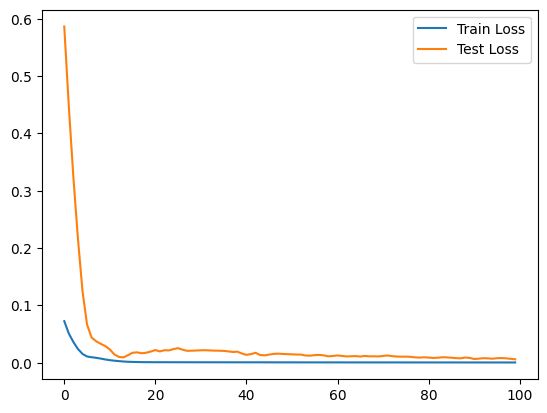

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Menampilkan grafik loss selama pelatihan
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

## 4. Evaluasi

In [6]:
# Menghitung MSE pada data test
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Prediksi untuk test set
y_pred = model.predict(X_test)

# Denormalisasi hasil prediksi dan data aktual
y_pred_denorm = scaler.inverse_transform(y_pred)
y_test_denorm = scaler.inverse_transform(y_test)

# Menampilkan beberapa hasil prediksi
for i in range(5):
    print(f"Prediksi: {y_pred_denorm[i]}, Aktual: {y_test_denorm[i]}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058
Test Loss (MSE): 0.006024118512868881
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediksi: [16693.387 16451.773], Aktual: [16700. 16250.]
Prediksi: [16696.658 16437.596], Aktual: [16650. 16300.]
Prediksi: [16704.79  16446.242], Aktual: [16850. 16450.]
Prediksi: [16756.475 16497.168], Aktual: [16950. 16550.]
Prediksi: [16834.098 16591.154], Aktual: [17000. 16600.]


In [7]:
import joblib
model.save('lstm_model_Gula.h5')

joblib.dump(scaler, 'scaler_gula.pkl')

['scaler_gula.pkl']

### test


In [8]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model dan scaler
model = load_model('lstm_model_Gula.h5')
scaler = joblib.load('scaler_gula.pkl')

# Data terakhir yang akan diprediksi (pastikan data ini dalam format yang benar)
last_input = np.array([ [15000, 14500],
                        [15500, 15000],
                        [14500, 14000]])  # Ambil 3 waktu langkah terakhir sebagai input

# Lakukan scaling pada input terakhir dengan scaler
last_input_scaled = scaler.transform(last_input)

# List untuk menyimpan hasil prediksi
predictions_list = []

# Prediksi untuk 2 minggu ke depan
for _ in range(5):  # Prediksi 5 periode (misalnya minggu ke-1, ke-2, dst)
    # Melakukan prediksi dengan input yang sudah discale
    prediction = model.predict(last_input_scaled.reshape(1, 3, 2))  # Mengubah bentuk input sesuai yang dibutuhkan LSTM
    prediction_denorm = scaler.inverse_transform(prediction)  # Denormalisasi hasil prediksi
    print(f"Prediksi minggu ke-{_+1}: {prediction_denorm}")

    # Menyimpan hasil prediksi dalam list
    predictions_list.append(prediction_denorm.flatten())  # Gunakan flatten agar prediksi berbentuk array 1D

    # Update input dengan prediksi terbaru dan lakukan scaling pada prediksi baru
    last_input_scaled = np.append(last_input_scaled[1:], prediction, axis=0)

# Konversi list hasil prediksi ke dalam array numpy (optional)
predictions_array = np.array(predictions_list)

# Print hasil dalam array numpy
print("Hasil prediksi dalam bentuk array numpy:")
print(predictions_array)



c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediksi minggu ke-1: [[15239.761 14624.775]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi minggu ke-2: [[15275.906 14647.395]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi minggu ke-3: [[15174.636 14410.47 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi minggu ke-4: [[15346.542 14689.093]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediksi minggu ke-5: [[15363.303  14680.6045]]
Hasil prediksi dalam bentuk array numpy:
[[15239.761  14624.775 ]
 [15275.906  14647.395 ]
 [15174.636  14410.47  ]
 [15346.542  14689.093 ]
 [15363.303  14680.6045]]


## Deployment

link deployment :